<a href="https://colab.research.google.com/github/ParsaMohammadpour/k-means-clustering/blob/main/k-means-image-color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import cv2
import pandas as pd
import numpy as np
import random
from google.colab.patches import cv2_imshow

# Implementing K-Mean Algorithm

In [ ]:
class K_Means:
    def __init__(self, k, data):
        self.k = k
        self.df = data

    def distance(self, x1, x2):
        summation = np.sum((x1 - x2) ** 2)
        return np.sqrt(summation)

    def closest_centroid(self, node):
        distances = np.array([self.distance(node, i) for i in self.centroids])
        min_index = np.argmin(distances)
        return min_index

    def make_random_cetroids(self, k):
        random_numbers = random.sample(range(len(self.df.index)), k)
        centroids = np.array([self.df[['r', 'g', 'b']].values[i] for i in random_numbers])
        return centroids

    def calculate_new_centroids(self):
        cluster_avg = self.df.groupby('new-cluster').mean().reset_index()
        new_centroids = list(cluster_avg[['r', 'g', 'b']].values)
        empty_clusters = self.k - len(new_centroids)
        random_centroids = list(self.make_random_cetroids(empty_clusters))
        new_centroids = new_centroids + random_centroids
        new_centroids = np.array(new_centroids)
        return new_centroids

    def new_iterate(self):
        self.centroids = self.calculate_new_centroids()
        print('new centroids:\n', self.centroids)
        self.df['new-cluster'] = [self.closest_centroid(i[:3]) for i in self.df[['r', 'g', 'b']].values]

    def cluster(self):
        self.centroids = self.make_random_cetroids(self.k)
        print('Centroids:\n', self.centroids)
        self.df['pre-cluster'] = 0
        self.df['new-cluster'] = [self.closest_centroid(i) for i in self.df[['r', 'g', 'b']].values]
        iterate = True
        while iterate:
            self.df['pre-cluster'] = self.df['new-cluster']
            self.new_iterate()
            iterate = not self.df['new-cluster'].equals(self.df['pre-cluster'])
        return self.centroids

# Loading Image & Printing Image Size

(128, 128, 3)


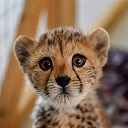

In [ ]:
img = cv2.imread('pirooz.jpg')
print(img.shape)
cv2_imshow(img)

# Converting Image To Dataframe For K-Mean Algorithm

In [ ]:
df = pd.DataFrame(img.reshape(-1, 3), columns = ['r', 'g', 'b'])
df

,r,g,b
0,232,223,214
1,231,222,213
2,230,221,212
3,230,221,212
4,219,210,200
...,...,...,...
16379,96,103,112
16380,95,97,108
16381,90,92,103
16382,88,88,100


# Clustering Image Color By K-Mean

In [ ]:
k_mean = K_Means(16, df)
centroids = k_mean.cluster()
df

Centroids:
 [[ 75  78  86]
 [ 74 110 148]
 [105 120 139]
 [203 198 195]
 [160 185 195]
 [ 79  80  94]
 [ 68 112 165]
 [ 31  50  83]
 [104 129 161]
 [111 128 154]
 [138 153 169]
 [122 147 179]
 [162 165 169]
 [101 133 168]
 [ 44 105 155]
 [131 161 188]]
new centroids:
 [[ 88.92890995 106.13625592 129.4028436 ]
 [ 76.47296059 106.40971586 139.20439963]
 [ 81.84807256 108.18253968 137.02040816]
 [145.64795565 154.16077616 165.70755371]
 [ 96.76404494 116.05617978 138.98365679]
 [ 95.22755102 111.1744898  132.97142857]
 [ 73.42334254 108.30662983 145.45303867]
 [ 86.75288684 107.5669746  133.2113164 ]
 [ 84.50804829 111.33299799 141.31790744]
 [ 79.68728121 104.47841307 133.31155193]
 [ 93.50509165 114.3604888  137.97759674]
 [ 99.322253   123.75623269 151.04893813]
 [ 91.65070093 112.38551402 136.73247664]
 [ 89.48696559 117.54848801 148.66214807]
 [ 67.86454183 102.90358566 140.36175299]
 [ 91.80693642 113.28901734 138.36184971]]
new centroids:
 [[ 84.12573443  81.77673325  95.19271445]


,r,g,b,pre-cluster,new-cluster
0,232,223,214,3,3
1,231,222,213,3,3
2,230,221,212,3,3
3,230,221,212,3,3
4,219,210,200,3,3
...,...,...,...,...,...
16379,96,103,112,12,12
16380,95,97,108,12,12
16381,90,92,103,12,12
16382,88,88,100,12,12


# Converting Result Dataframe To Image By Centroids & Reshaping Result

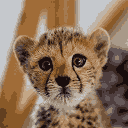

In [ ]:
reduced_img = []
for i in df.values:
  reduced_img.append(centroids[i[4]])
reduced_img = np.array(reduced_img)
reduced_img = reduced_img.reshape(128, 128, 3)
cv2_imshow(reduced_img)

# Saving Image

In [ ]:
cv2.imwrite('Reduced-Image.jpg', reduced_img)

True